# S.I.R. Modell

Diese Case-Study ist eine vom Blog-post von Bhaskar Krishnamachari [1] sowie der Fallstudie aus dem Buch "Learning Scientific Python" von Christian Hill [2] inspiriert. 



Das S.I.R Model ist ein klassischer Ansatz in der Epidemiologie zur Modellierung der Ausbreitung von Krankheiten mit Immunität. Jede Person wird dabei in eine von drei Gruppen eingeteilt:
* Gruppe S (Susceptible): Nicht immune, gesunde Personen
* Gruppe I (Infected): Infizierte Personen
* Gruppe R (Recovered): Genesene (immunisierte) Personen

Es werden folgende Annahmen gemacht:
* Jede Person wird nur einmal infiziert und wird danach gesund oder stirbt
* Infizierte sind sofort ansteckend
* Die Infektionsrate ist konstant.
* Die verstorbenen Personen werden wie die Immunisierten zu R gezählt. 

In der Simulation ist die Zeit in Tage diskretisiert und wir berechnen für aufeinander folgende Tage wie viele Menschen jeweils in der Gruppe S, I und R sind. Dies geschieht mit Differenzialgleichungen (einfache und vorgegebene Formeln) welche die Änderung der Anzahl Personen in den einzelnen Gruppen beschreiben. Wenn wir die Zahlen an einem Tag kennen, dann können wir die Änderungen welche zu erwarten sind mit den vorgegebenen Gleichungen berechnen. Dabei bezeichnet die berechnete Zahl $\frac{dX}{dt}$ jeweils die Änderung der Grösse $X$ in einem Zeitschritt, also in unserer Simulation die Änderung in einem Tag. Der Wert am Folgetag ist dann einfach die Summe $X+\frac{dX}{dt}$.

Es gelten folgende Gleichungen
$$
\begin{align}
\frac{dS}{dt} &= -\beta \frac{SI}{N}  \\
\frac{dI}{dt} &= \beta \frac{SI}{N} - \gamma I  \\
\frac{dR}{dt} &= \gamma I
\end{align}
$$

Dabei bezeichnet die Zahl $\beta$ die Ansteckungsrate (wieviele Ansteckungen ein Fall pro Zeiteinheit verursacht) und die Zahl $\gamma$ die Rate mit der sich infizierte erholen. Die Zahl $N = S + I + R$ bezeichnet die totale Anzahl Personen in der Simulation. Sie sehen, alle Gleichungen bestehen aus einfachen Produkten, Brüchen, Additionen, Subtraktionen bzw. dem Umkehren des Vorzeichens.


Wir werden dieses Modell nun in Python simulieren, also die Berechnungen implementieren und dann wiederholt in einer Schleife anwenden um die Werte für eine bestimmte Anzahl Tage zu erhalten.

#### Bibliotheken

Um die Verläufe zu plotten nutzen wir wieder pyplot, welches wir mit der nächsten Zeile importieren. 

In [1]:
from matplotlib.pyplot import *

#### Ein Schritt der Simulation

Wir schreiben uns als erstes eine Funktion, welche den aktuellen Zustand der Bevölkerung (beschrieben durch $S, I, R$) sowie die parameter $\beta$ und $\gamma$ entgegennimmt und uns eine Zeiteinheit simuliert. 
Als Zeiteinheit nehmen wir nun einen Tag. Der Rückgabewert ist der neue Zustand der Bevölkerung am nächsten Tag. 

In [2]:
# The SIR model differential equations.
def nextDay(S, I, R, beta, gamma):
    N = S + I + R
    nextS = S - beta * S * I / N 
    nextI = I + beta * S * I / N - gamma * I
    nextR = R + gamma * I
    return (nextS, nextI, nextR)


Nun können wir den Verlauf simulieren. Wir initialisieren die Parameter und rufen dann die Funktion ```nextDay``` innerhalb einer Schleife auf. In jedem Schleifendurchlauf wird ein Tag simuliert. 
Dabei speichern wir den jeweiligen Zustand in einer Liste, damit wir diesen am Ende visualisieren können. 

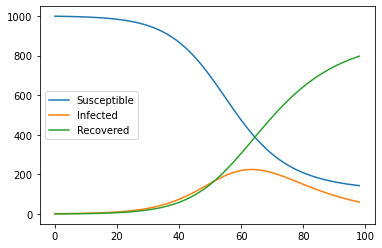

In [3]:
N = 1000
I = 1
R = 0
S = N - I - R
beta = 0.2
gamma = 1.0 / 12

Ss = []
Is = []
Rs = []


for i in range(1, 100):
    (S, I, R) = nextDay(S, I, R, beta, gamma)
    Ss.append(S)
    Is.append(I)
    Rs.append(R)

plot(Ss, label= "Susceptible")
plot(Is, label= "Infected")
plot(Rs, label = "Recovered")
legend()
show()

### Referenzen
1. [Bhaskar Krishnamachari - Simulating Covid-19 with 6 lines of code — the SIR epidemic model](https://medium.com/@bhaskark2/simulating-covid-19-in-6-lines-of-code-the-sir-epidemic-model-89aab118cb7b)
2. [Christian Hill - Learning Scientific Programming with Python](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)
